In [1]:
import nltk
from nltk import FreqDist
nltk.download('stopwords') # run this one time

[nltk_data] Downloading package stopwords to C:\Users\Win-
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import json
app=pd.read_json('C:/Users/Win- 10/Desktop/Appliances.json',lines=True)

In [5]:
app=app.iloc[:10000,:]

<h1> To check the freq of words in raw text review</h1>

In [6]:
def freq_words(x, terms=30):
    #print(x.shape)
    x=[i for i in x]
#     print(x)
    all_words = ''
    for j in x:
        all_words+=str(j)
#     print(all_words)
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel= 'Count')
    plt.show()

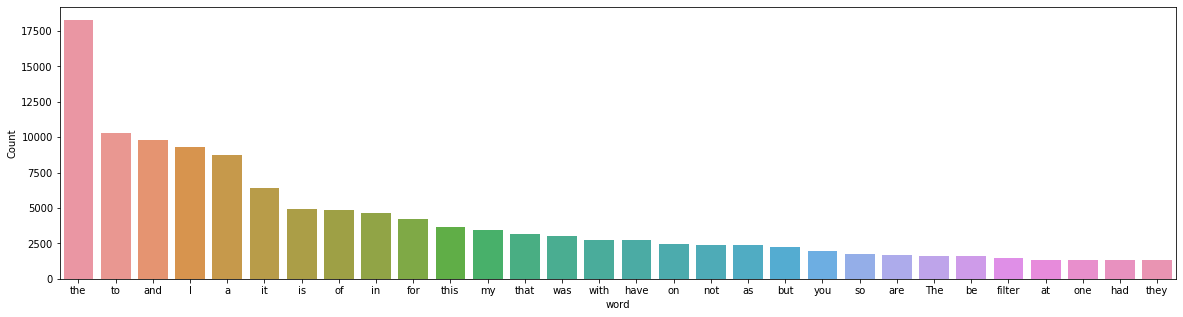

In [7]:
freq_words(app['reviewText'])

<h1>Data Preprocessing</h1>

In [8]:
# remove unwanted characters, numbers and symbols
app['reviewText'] = app['reviewText'].str.replace("[^a-zA-Z#]", " ")

<p>removing stopwirds and punctuations</p>

In [9]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [10]:
from string import punctuation
p=set(punctuation)

In [11]:
s=set.union(stop_words,p)

In [12]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in s])
    return rev_new

# remove short words (length < 3)
app['reviewText']=app['reviewText'].astype(str)
app['reviewText'] = app['reviewText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in app['reviewText']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

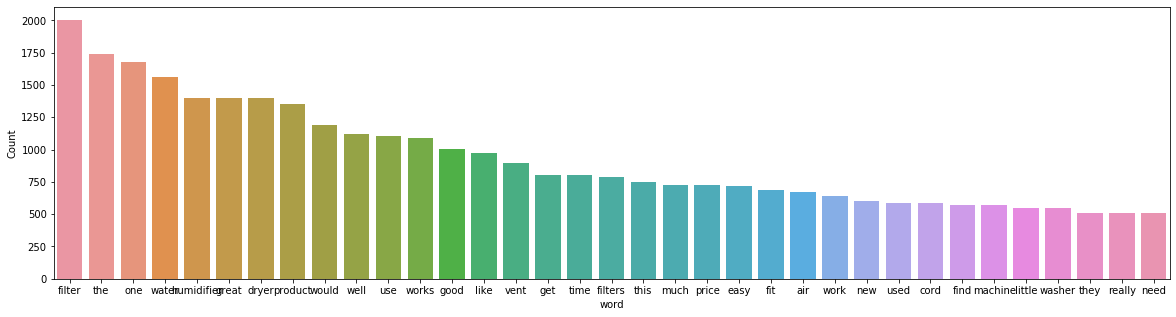

In [13]:
freq_words(reviews, 35)

In [19]:
!python -m spacy download en # one time run

ERROR: Invalid requirement: '#'



In [14]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['enjoyed', 'alan', 'gregerman', 'weekly', 'blog', 'two', 'previous', 'books', 'since', 'taking', 'innovation', 'class', 'alan', 'decade', 'ago', 'opened', 'eyes', 'seeing', 'world', 'fresh', 'way', 'also', 'taught', 'structured', 'techniques', 'use', 'increase', 'creative', 'problem', 'solving', 'skills', 'teams', 'individuals', 'alan', 'untangles', 'difference', 'invention', 'innovation', 'makes', 'much', 'easier', 'see', 'innovation', 'adaption', 'proven', 'inventions', 'borrowed', 'industries', 'disciplines', 'contexts', 'cultures', 'his', 'previous', 'book', 'surrounded', 'geniuses', 'excellent', 'great', 'mix', 'ideas', 'memorable', 'examples', 'insights', 'action', 'his', 'newest', 'book', 'the', 'necessity', 'strangers', 'builds', 'previous', 'body', 'knowledge', 'delves', 'critical', 'dimension', 'innovation', 'research', 'power', 'making', 'connections', 'outside', 'one', 'group', 'discover', 'alternative', 'approaches', 'addressing', 'challenge', 'the', 'book', 'full', 'exce

In [15]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
from nltk import sent_tokenize, word_tokenize

def penn2morphy(penntag):
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 
def lemmatize_sent(text): 
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(word_tokenize(text))]
    


In [16]:
tok_l=[]
for i in range(tokenized_reviews.shape[0]):
    x=' '.join(tokenized_reviews[i])
    #print(p)
    t=[]
    lmm=lemmatize_sent(x)
    #y=list(map(str.lower, word_tokenize(s)))
    for j in lmm:
            if j not in s:
                t.append(j)
    #l.extend(t)
    tok_l.append(t)
print(tok_l[1])

['enjoy', 'alan', 'gregerman', 'weekly', 'blog', 'two', 'previous', 'book', 'since', 'take', 'innovation', 'class', 'alan', 'decade', 'ago', 'open', 'eye', 'see', 'world', 'fresh', 'way', 'also', 'teach', 'structure', 'technique', 'use', 'increase', 'creative', 'problem', 'solve', 'skill', 'teams', 'individual', 'alan', 'untangles', 'difference', 'invention', 'innovation', 'make', 'much', 'easy', 'see', 'innovation', 'adaption', 'proven', 'invention', 'borrow', 'industry', 'discipline', 'context', 'culture', 'previous', 'book', 'surround', 'genius', 'excellent', 'great', 'mix', 'idea', 'memorable', 'example', 'insight', 'action', 'new', 'book', 'necessity', 'stranger', 'build', 'previous', 'body', 'knowledge', 'delve', 'critical', 'dimension', 'innovation', 'research', 'power', 'make', 'connection', 'outside', 'one', 'group', 'discover', 'alternative', 'approach', 'address', 'challenge', 'book', 'full', 'excellent', 'example', 'individual', 'organization', 'tackle', 'challenge', 'seek'

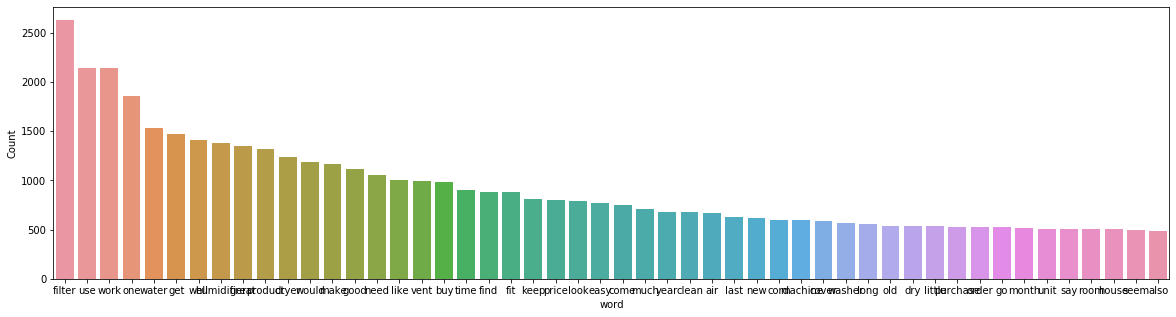

In [19]:

reviews_3 = []
for i in range(len(tok_l)):
    reviews_3.append(' '.join(tok_l[i]))

app['reviews'] = reviews_3

freq_words(app['reviews'],50)

<h1>LDA Model</h1>

<p><b>Forming term dictionary: Document-Term Frequency</b></p>

In [21]:
dictionary = corpora.Dictionary(tok_l)

<p>Forming the doc term frequency matrix</p>

In [22]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tok_l]

In [28]:
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=100)

In [26]:
lda_model.print_topics()

[(0,
  '0.061*"refrigerator" + 0.055*"bulb" + 0.054*"light" + 0.019*"replace" + 0.019*"paint" + 0.019*"screw" + 0.017*"old" + 0.016*"lead" + 0.016*"hole" + 0.016*"side"'),
 (1,
  '0.096*"filter" + 0.034*"humidifier" + 0.026*"one" + 0.019*"use" + 0.019*"buy" + 0.019*"last" + 0.016*"replacement" + 0.014*"order" + 0.014*"year" + 0.014*"get"'),
 (2,
  '0.066*"water" + 0.047*"use" + 0.025*"fridge" + 0.024*"keep" + 0.023*"clean" + 0.019*"freezer" + 0.014*"humidifier" + 0.013*"get" + 0.011*"smell" + 0.009*"taste"'),
 (3,
  '0.251*"work" + 0.115*"great" + 0.074*"well" + 0.059*"fit" + 0.042*"perfectly" + 0.038*"easy" + 0.033*"perfect" + 0.030*"fine" + 0.023*"install" + 0.021*"expect"'),
 (4,
  '0.051*"cover" + 0.043*"look" + 0.039*"nice" + 0.036*"burner" + 0.029*"color" + 0.026*"like" + 0.018*"bright" + 0.016*"make" + 0.015*"really" + 0.012*"love"'),
 (5,
  '0.020*"machine" + 0.015*"use" + 0.015*"wash" + 0.013*"washer" + 0.012*"one" + 0.012*"get" + 0.010*"small" + 0.010*"clothes" + 0.009*"littl

In [27]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.186953 -0.054995       1        1  20.958450
1      0.180107  0.055616       2        1  16.400980
7      0.114593 -0.004476       3        1  15.267990
8      0.132815 -0.021453       4        1  12.392240
2      0.133603 -0.084692       5        1  10.638268
9     -0.027764  0.249938       6        1   7.374106
4     -0.042708 -0.080292       7        1   5.962879
3     -0.210672  0.270552       8        1   4.978094
0     -0.201187 -0.190495       9        1   4.259832
6     -0.265739 -0.139704      10        1   1.767159, topic_info=     Category         Freq          Term        Total  loglift  logprob
514   Default  3024.000000          work  3024.000000  30.0000  30.0000
1015  Default  2904.000000        filter  2904.000000  29.0000  29.0000
101   Default  2031.000000         great  2031.000000  28.0000  28.0000
338   Default  1302.000000          need  1302.000000  27.0000  27.0000
965   Default  1870.000000         water  1870.000000  26.0000  26.0000
393   Default  1539.000000          well  1539.000000  25.0000  25.0000
443   Default  1516.000000          good  1516.000000  24.0000  24.0000
411   Default  1748.000000       product  1748.000000  23.0000  23.0000
1235  Default  1003.000000         price  1003.000000  22.0000  22.0000
1230  Default  1042.000000           fit  1042.000000  21.0000  21.0000
151   Default  2504.000000           use  2504.000000  20.0000  20.0000
1229  Default  1231.000000         dryer  1231.000000  19.0000  19.0000
766   Default   399.000000       exactly   399.000000  18.0000  18.0000
1474  Default  1380.000000    humidifier  1380.000000  17.0000  17.0000
1393  Default   588.000000         cover   588.000000  16.0000  16.0000
4514  Default   479.000000  refrigerator   479.000000  15.0000  15.0000
1218  Default   721.000000          cord   721.000000  14.0000  14.0000
437   Default   882.000000          look   882.000000  13.0000  13.0000
1356  Default   781.000000          vent   781.000000  12.0000  12.0000
5063  Default   434.000000          bulb   434.000000  11.0000  11.0000
787   Default   424.000000         light   424.000000  10.0000  10.0000
86    Default   900.000000          easy   900.000000   9.0000   9.0000
899   Default   480.000000          nice   480.000000   8.0000   8.0000
2399  Default   769.000000       machine   769.000000   7.0000   7.0000
1320  Default   384.000000     perfectly   384.000000   6.0000   6.0000
3579  Default   395.000000        burner   395.000000   5.0000   5.0000
179   Default   841.000000          keep   841.000000   4.0000   4.0000
3180  Default   486.000000        fridge   486.000000   3.0000   3.0000
1381  Default   570.000000          room   570.000000   2.0000   2.0000
187   Default   489.000000       perfect   489.000000   1.0000   1.0000
...       ...          ...           ...          ...      ...      ...
2855  Topic10    12.146777   outstanding    13.024452   3.9660  -5.5901
91    Topic10    11.073827       example    11.951726   3.9595  -5.6825
6280  Topic10    10.930389       readout    11.808163   3.9586  -5.6956
5516  Topic10    10.261369        rarely    11.139052   3.9537  -5.7587
1087  Topic10    10.149353          pile    11.027074   3.9529  -5.7697
693   Topic10    10.068284        repeat    10.946079   3.9522  -5.7777
2658  Topic10     9.899296      received    10.777034   3.9508  -5.7947
2717  Topic10     9.682846      dissolve    10.560697   3.9490  -5.8168
1617  Topic10     9.434294       thicker    10.312125   3.9468  -5.8428
7494  Topic10     9.069213       crystal     9.946873   3.9434  -5.8822
4042  Topic10     8.570089          tree     9.447800   3.9383  -5.9388
1545  Topic10     8.306273         threw     9.184021   3.9353  -5.9701
1764  Topic10     8.109351          serf     8.986955   3.9330  -5.9941
5526  Topic10     8.008787           rim     8.886557   3.9318  -6.00